In [1]:
# Programmer: Mahek Suhail Shaikh
# College: Keystone School Of Engineering ,Pune
# Class:TE-B
# RollNo: 29
# Problem Statement No : 7 (Planets Dataset)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load the dataset containing information about exoplanets discovered outside of our solar system.

df=pd.read_csv('planets.csv')
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


# 1.Print total number of entries in the dataset.

In [4]:
#method 1
entries=len(df)
print(f'The total number of entries in the dataset is {entries}.')

The total number of entries in the dataset is 1035.


In [5]:
#method 2
print(f'The total number of entries in the dataset is {df.shape[0]}.')

The total number of entries in the dataset is 1035.


In [6]:
#method 3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


### About the Dataset

In [7]:
df.shape

(1035, 6)

In [8]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [9]:
df.ffill(inplace = True)

In [10]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

# 2. What are the most common methods used for discovering exoplanets?

In [12]:
com = df['method'].value_counts().idxmax()
print("Most common discovery method:", com)

Most common discovery method: Radial Velocity


# 3. How many exoplanets were discovered each year?

In [14]:
ex= df['year'].value_counts().sort_index()
print("Exoplanets discovered each year:\n",ex)
# OR 
#df['year'].value_counts()

Exoplanets discovered each year:
 1989      1
1992      2
1994      1
1995      1
1996      6
1997      1
1998      5
1999     15
2000     16
2001     12
2002     32
2003     25
2004     26
2005     39
2006     31
2007     53
2008     74
2009     98
2010    102
2011    185
2012    140
2013    118
2014     52
Name: year, dtype: int64


<Axes: >

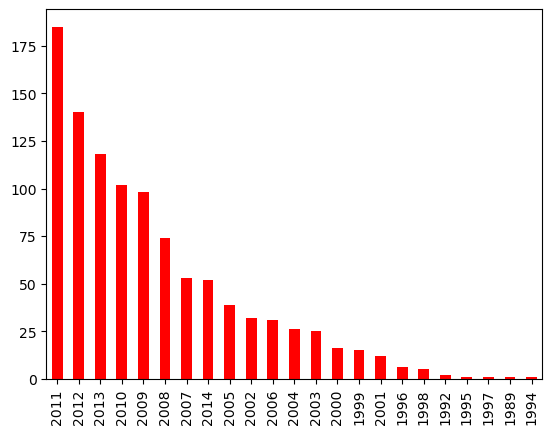

In [16]:
df['year'].value_counts().plot(kind='bar',color='r')

# 4. Plot the distribution of exoplanet masses.

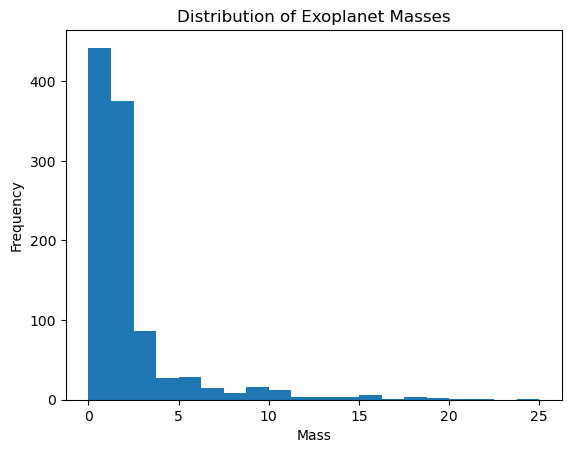

In [15]:
df['mass'].plot(kind='hist', bins=20)
plt.xlabel('Mass')
plt.ylabel('Frequency')
plt.title('Distribution of Exoplanet Masses')
plt.show()

# 5. Calculate the correlation between exoplanet mass and radius.

In [17]:
# Creating radii column
df = df.assign(radii = df.distance / 2)
df

,method,number,orbital_period,mass,distance,year,radii
0,Radial Velocity,1,269.300000,7.10,77.40,2006,38.700
1,Radial Velocity,1,874.774000,2.21,56.95,2008,28.475
2,Radial Velocity,1,763.000000,2.60,19.84,2011,9.920
3,Radial Velocity,1,326.030000,19.40,110.62,2007,55.310
4,Radial Velocity,1,516.220000,10.50,119.47,2009,59.735
...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,1.54,172.00,2006,86.000
1031,Transit,1,2.615864,1.54,148.00,2007,74.000
1032,Transit,1,3.191524,1.54,174.00,2007,87.000
1033,Transit,1,4.125083,1.54,293.00,2008,146.500


In [18]:
correlation = df['mass'].corr(df['radii'])
print("Correlation between exoplanet mass and radius:", correlation)

Correlation between exoplanet mass and radius: -0.06348628676436326


# 6. Print the names of exoplanets with the largest and smallest radii.

In [19]:
large = df.loc[df['radii'].idxmax(), 'method']
small = df.loc[df['radii'].idxmin(), 'method']
print("Exoplanet with largest radius discovered using:", large)
print("Exoplanet with smallest radius discovered using:", small)

Exoplanet with largest radius discovered using: Transit
Exoplanet with smallest radius discovered using: Radial Velocity


# 7. Plot the average orbital period by discovery method.

Text(0, 0.5, 'Average Orbital Period')

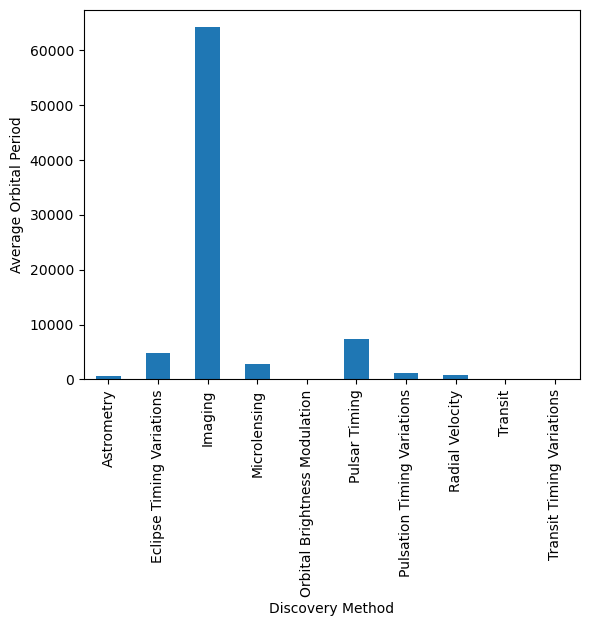

In [20]:
avgop = df.groupby('method')['orbital_period'].mean()
avgop.plot(kind='bar')
plt.xlabel('Discovery Method')
plt.ylabel('Average Orbital Period')

# 8. Calculate the percentage of exoplanets discovered using each method.

Percentage of exoplanets discovered using each method:
Radial Velocity                  53.429952
Transit                          38.357488
Imaging                           3.671498
Microlensing                      2.222222
Eclipse Timing Variations         0.869565
Pulsar Timing                     0.483092
Transit Timing Variations         0.386473
Orbital Brightness Modulation     0.289855
Astrometry                        0.193237
Pulsation Timing Variations       0.096618
Name: method, dtype: float64


<Axes: ylabel='number'>

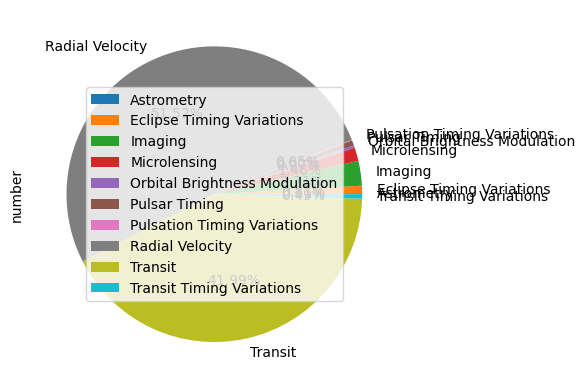

In [24]:
mper = (df['method'].value_counts() / entries) * 100
print("Percentage of exoplanets discovered using each method:")
print(mper)

#can use pie chart to show the actual perct distribution

df.groupby(['method']).sum().plot(kind='pie',y='number',autopct='%.2f%%')

# 9. Print the names of exoplanets discovered using the transit method with a radius greater than 2 Earth radii.

In [25]:
tm = df[(df['method'] == 'Transit') & (df['radii'] > 2)]['method']
print("Exoplanets discovered using transit method with radius greater than 2 Earth radii:")
print(tm)

Exoplanets discovered using transit method with radius greater than 2 Earth radii:
91      Transit
92      Transit
93      Transit
94      Transit
95      Transit
         ...   
1030    Transit
1031    Transit
1032    Transit
1033    Transit
1034    Transit
Name: method, Length: 397, dtype: object


# 10. Plot the distribution of exoplanet radii by discovery method.

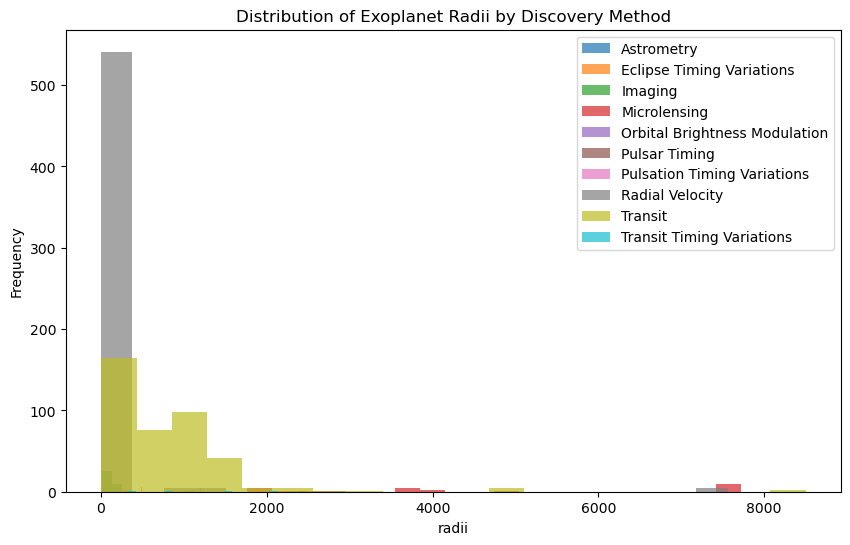

In [27]:
plt.figure(figsize=(10, 6))
for method, data in df.groupby('method'):
    plt.hist(data['distance'], alpha=0.7, label=method, bins=20)
plt.xlabel('radii')
plt.ylabel('Frequency')
plt.title('Distribution of Exoplanet Radii by Discovery Method')
plt.legend()
plt.show()

<BarContainer object of 1035 artists>

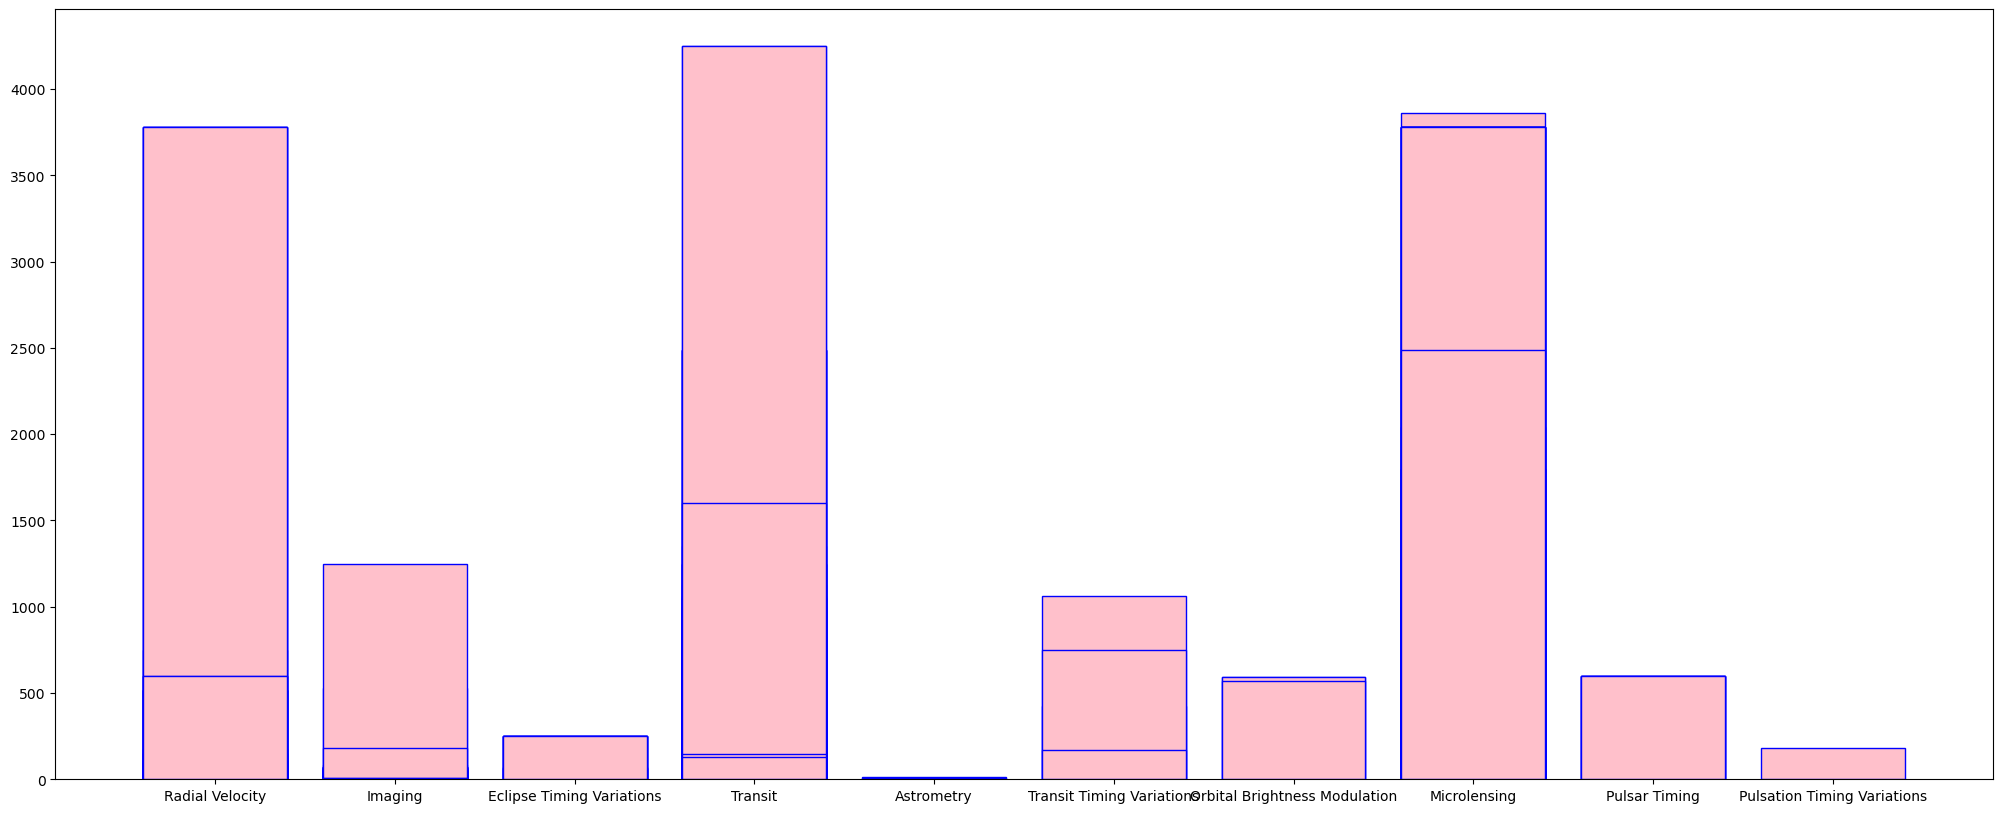

In [29]:
plt.figure(figsize=(25,10))
plt.bar(df['method'],df['radii'],color='pink',edgecolor='blue')